In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from Correlation_matrix import CorrMtx
# import seaborn as sns

In [2]:
########## SPECIFY DATAFRAME HERE ################################
channel = 0  # ee=0, emu = 1, mumu=2

# channels = ["ee", "emu", "mumu"]

path = "/depot-new/cms/top/zhou907"

file = path + "/" + "ee_modified_root_2_1.csv"

In [3]:
dataframe = pd.read_csv(file)   # read the csv file and make a dataframe
dataframe = dataframe.drop(['eventWeight'], axis = 1)  # remove eventWeight from dataframe
dataframe = dataframe.drop(['production_mode'], axis = 1)   # remove production mode from dataframe

In [4]:
dataframe   # show dataframe

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,b_pt,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass
0,0.196395,0.401817,1.523488,1.100096,0.437924,0.232502,0.889169,0.465777,1.327093,0.903701,...,43.164726,61.223160,55.912968,60.569515,73.736588,85.727631,0.000000e+00,132.345215,86.564339,395.892334
1,0.172882,0.338345,0.095944,2.081524,0.151838,0.663065,0.420664,1.756804,0.268826,1.908642,...,58.718460,57.919064,66.662498,9.865296,86.294891,34.284901,0.000000e+00,91.426224,51.661064,357.865204
2,0.927498,0.191133,3.020247,0.361787,1.366539,2.485170,0.726209,1.932250,2.092748,0.565711,...,43.454281,78.188980,42.291389,70.709892,149.972198,40.723141,1.110223e-16,20.742170,71.965454,568.250061
3,0.180216,0.155463,1.146340,1.088407,1.069548,1.094300,0.103424,2.338171,0.966124,1.268623,...,63.876171,70.141838,59.980759,14.512580,85.544365,48.901600,7.105427e-15,38.919216,31.414345,373.534393
4,1.693352,0.851445,0.393477,0.611020,1.780469,0.764327,0.480594,0.698138,1.299875,1.082331,...,37.103329,51.873825,115.054474,32.219822,140.827530,147.562439,0.000000e+00,167.645020,58.836834,428.166321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814619,0.560937,0.571842,1.540824,0.977205,0.524936,0.535841,1.504823,0.941204,0.979886,0.416268,...,81.831055,150.701614,17.319975,52.204456,42.638184,79.431847,2.842171e-14,63.620266,49.506519,468.926697
814620,0.724043,0.138342,3.696949,0.520334,0.844741,1.707127,2.128164,1.048451,2.972905,0.203709,...,45.463120,119.378471,21.067116,49.610783,40.924866,115.609200,5.684342e-14,37.556633,128.474823,635.448181
814621,1.280565,0.689676,1.869368,0.409543,0.684231,1.275119,0.095428,1.555253,0.588803,0.871022,...,157.176483,92.111130,31.319874,108.905815,122.867226,15.439472,3.552714e-15,104.013481,182.620667,712.447571
814622,0.727869,0.791849,1.661288,0.183191,1.262159,0.257559,1.126999,0.717480,2.389158,0.544678,...,48.212143,100.290535,21.345388,42.599651,78.865273,135.267517,0.000000e+00,65.450943,141.981888,446.921509


In [5]:
corr = dataframe.corr()   # create a dataframe which shows the correlations

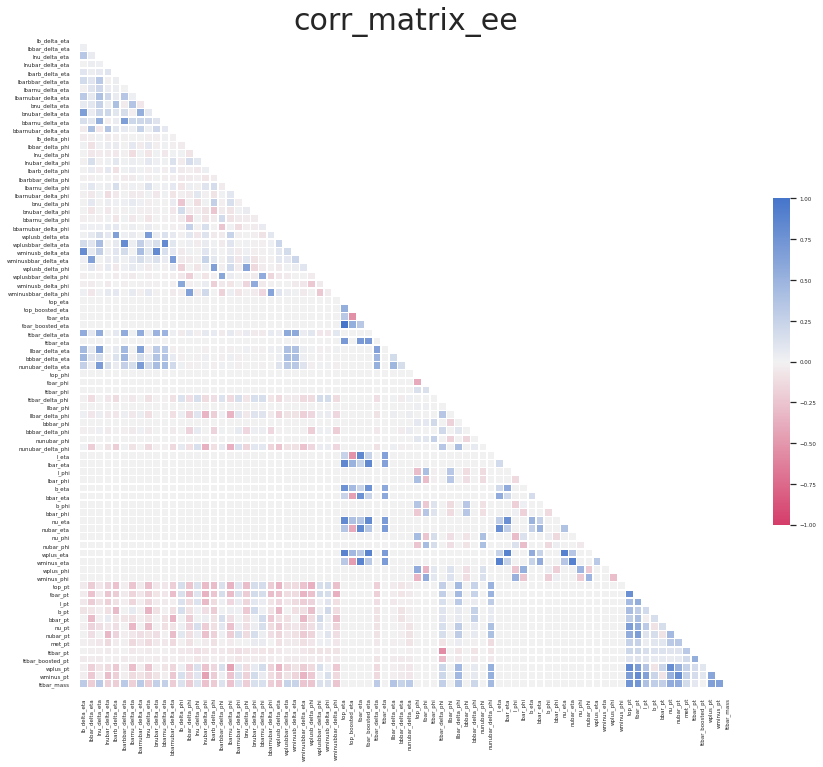

In [6]:
heatmap = CorrMtx(corr, dropDuplicates = True, title = 'corr_matrix_ee')   # plot the correlation matrix

# Create list of correlated pairs

In [129]:
################ DEFINE CUT HERE ################################
cut = 0.8  # this cut is used for minimum correlation allowed

In [130]:
# create dataframe with only lower half of values non zero
mask = np.zeros_like(corr, dtype=np.bool)   # initialize the mask as all zeros and same size as corr
mask[np.triu_indices_from(mask)] = True   # make mask upper triangular true (otherwise false)
corr_df = np.abs(corr * (~mask))   # multiply by NOT mask to turn all uppertriangular values into zero
corr_df   # show resulting dataframe

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,b_pt,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass
lb_delta_eta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lbbar_delta_eta,0.030943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lnu_delta_eta,0.340966,0.049598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lnubar_delta_eta,0.003232,0.037114,0.020375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lbarb_delta_eta,0.098538,0.036772,0.067719,0.107455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ttbar_pt,0.000815,0.030505,0.022232,0.045859,0.029388,0.001193,0.047551,0.019713,0.043409,0.012132,...,0.117199,0.120103,0.106419,0.107256,0.323489,0.000000,0.000000,0.000000,0.000000,0.0
ttbar_boosted_pt,0.041781,0.032300,0.039199,0.014751,0.030697,0.042373,0.016038,0.039092,0.025355,0.035423,...,0.060579,0.061950,0.052878,0.055217,0.181189,0.543616,0.000000,0.000000,0.000000,0.0
wplus_pt,0.022028,0.182038,0.072318,0.125514,0.219793,0.015857,0.284112,0.028108,0.235007,0.030810,...,0.071302,0.227623,0.812274,0.520368,0.248559,0.169619,0.086448,0.000000,0.000000,0.0
wminus_pt,0.017673,0.222274,0.028728,0.283681,0.181703,0.022153,0.122951,0.073715,0.149164,0.079629,...,0.228523,0.072956,0.520542,0.811906,0.249971,0.167954,0.087471,0.605493,0.000000,0.0


In [131]:
def find_correlation(corr_df, cut=0.5):
    """
    This function finds all pairs which are correlated as much as required by the cut, as well as adds a column
    specifying the number of variables a given variable is correlated with to the dataframe. It returns both of these
    """
    print(cut)
    correlated_pairs = []

    num_correlated = np.zeros(len(corr_df))

    col_int = 0
    for col in corr_df:

        row_int = 0
        for row in corr_df.index:
            if abs(corr_df[row][col]) >= cut:
                correlated_pairs.append((col, row))

                num_correlated[row_int] += 1
                num_correlated[col_int] += 1
            row_int += 1
        
        col_int += 1

    corr_df['number_correlated'] = num_correlated
    return corr_df, correlated_pairs

In [132]:
# corr_df = corr_df.drop(['number_correlated'], axis=1)
# corr_df = corr_df.drop(['number_correlated'], axis=0)
corr_df, pairs = find_correlation(corr_df, cut=cut)   # find correlated pairs (beyond the cut) of corr_df
sorted_df = corr_df.sort_values(by=['number_correlated'], ascending=False)   # sort by number correlated
sorted_df   # show the sorted dataframe

0.8


,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass,number_correlated
top_eta,0.000582,0.001465,0.000527,0.001008,0.003124,0.004736,0.000706,0.001700,0.001575,0.000896,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.0
wplus_eta,0.000593,0.001756,0.000333,0.000171,0.004020,0.004327,0.000020,0.001543,0.002367,0.001250,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.0
tbar_boosted_eta,0.000582,0.001465,0.000527,0.001008,0.003124,0.004736,0.000706,0.001700,0.001575,0.000896,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.0
nu_eta,0.000190,0.002251,0.000461,0.000073,0.002133,0.003701,0.000719,0.001728,0.003411,0.000977,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,3.0
tbar_eta,0.005091,0.002800,0.001085,0.001914,0.000255,0.002086,0.001174,0.001393,0.000775,0.004008,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wplusb_delta_phi,0.000859,0.077478,0.020886,0.057918,0.053498,0.016265,0.061552,0.016927,0.038727,0.007842,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
wminusbbar_delta_eta,0.015646,0.654024,0.004190,0.048143,0.069014,0.008275,0.070536,0.162314,0.068756,0.125248,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
wplusb_delta_eta,0.010036,0.068660,0.163070,0.071499,0.653936,0.015720,0.048059,0.005020,0.683255,0.050749,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
bbarnubar_delta_phi,0.020232,0.021123,0.019120,0.058854,0.074720,0.004150,0.036386,0.000703,0.047010,0.005861,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0


In [133]:
pairs   # show the pairs

[('wplusbbar_delta_eta', 'lbarbbar_delta_eta'),
 ('wplusbbar_delta_eta', 'bbarnu_delta_eta'),
 ('wminusb_delta_eta', 'lb_delta_eta'),
 ('wminusb_delta_eta', 'bnubar_delta_eta'),
 ('tbar_boosted_eta', 'top_eta'),
 ('l_eta', 'tbar_eta'),
 ('lbar_eta', 'top_eta'),
 ('lbar_eta', 'tbar_boosted_eta'),
 ('nu_eta', 'top_eta'),
 ('nu_eta', 'tbar_boosted_eta'),
 ('nubar_eta', 'tbar_eta'),
 ('wplus_eta', 'top_eta'),
 ('wplus_eta', 'tbar_boosted_eta'),
 ('wplus_eta', 'lbar_eta'),
 ('wplus_eta', 'nu_eta'),
 ('wminus_eta', 'tbar_eta'),
 ('wminus_eta', 'l_eta'),
 ('wminus_eta', 'nubar_eta'),
 ('wplus_pt', 'top_pt'),
 ('wplus_pt', 'nu_pt'),
 ('wminus_pt', 'tbar_pt'),
 ('wminus_pt', 'nubar_pt')]

# Figure out which parts of pairs to remove:

In [134]:
corr_df['importance'] = np.load("./results/twoLayer_averages.npy")  # load the average importance of each variables    
pairs_df = corr_df[corr_df['number_correlated'] > 0]   # create a dataframe which only includes correlated variables
pairs_df = pairs_df.sort_values(by=['importance'])   # sort the variables in this dataframe by the importance
pairs_df   # show the dataframe

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass,number_correlated,importance
wminus_pt,0.017673,0.222274,0.028728,0.283681,0.181703,0.022153,0.122951,0.073715,0.149164,0.079629,...,0.520542,0.811906,0.249971,0.167954,0.087471,0.605493,0.0,0.0,2.0,0.118836
wplus_pt,0.022028,0.182038,0.072318,0.125514,0.219793,0.015857,0.284112,0.028108,0.235007,0.030810,...,0.812274,0.520368,0.248559,0.169619,0.086448,0.000000,0.0,0.0,2.0,0.151671
nubar_pt,0.000188,0.108416,0.005336,0.325947,0.168038,0.017337,0.056927,0.107303,0.072801,0.103318,...,0.450201,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.210226
nu_pt,0.016324,0.168566,0.104802,0.060221,0.105326,0.000221,0.326735,0.006275,0.291143,0.011089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.221521
tbar_pt,0.031874,0.264800,0.041403,0.242716,0.206046,0.044526,0.162533,0.059182,0.187733,0.064175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.234602
top_pt,0.045838,0.206481,0.057521,0.165746,0.264658,0.029754,0.241126,0.040762,0.285213,0.060595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.246212
wminus_eta,0.005614,0.002775,0.001490,0.001366,0.000340,0.000802,0.000966,0.001651,0.001310,0.004367,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0,0.256635
wplus_eta,0.000593,0.001756,0.000333,0.000171,0.004020,0.004327,0.000020,0.001543,0.002367,0.001250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.0,0.256761
nubar_eta,0.004943,0.002020,0.001443,0.000439,0.000307,0.000159,0.000628,0.001602,0.001260,0.004599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.272091
nu_eta,0.000190,0.002251,0.000461,0.000073,0.002133,0.003701,0.000719,0.001728,0.003411,0.000977,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0,0.272634


In [135]:
pairs_df.shape

(21, 82)

In [162]:
############################## create a list of the least important set of variables which can be removed and still 
############################## result in no correlated pairs remaining
""" 
The general method is to remove the least important variable, and then remove all the variables it is paired with
from the list of variables which can be removed (in order to avoid removing too many variables). Then remove the next least 
important variable and repeat... One issue is that if we have the following pairs (A,B), (A,C) and (B,C) where A is the
least important then only A will be removed... I think this needs to be addressed.
"""

#########################################################################################################################
removed = []   # this will be the list of variables to remove
remaining_pairs = pairs[:]   # these are the pairs left to be dealt with
df = pairs_df    # create a dataframe identical to pairs_df so it can be modified while pairs still exists

while df.shape[0] > 0:   # loop until we remove everything from df
    remove = df.index[0]   # since df is sorted by importance, we want to remove the least important one which is at the
                            # beginning of the dataframe
        
    removed.append(remove)   # append this variable to the list of variables to remove
    
    i=0   # use a while loop because the size of remaining pairs is being adjusted in the loop
    while i < len(remaining_pairs):
        if remaining_pairs[i][0] == remove:  # if the first varaible in the ith pair is the one removed
            try:
                # drop the row of the second variable in the ith pair (because it is no longer correlated)
                df = df.drop([remaining_pairs[i][1]], axis = 0)
            except:
                pass
            remaining_pairs.pop(i)
            
        elif remaining_pairs[i][1] == remove: # otherwise the second varaible in the ith pair is the one removed
            try:
                df = df.drop([remaining_pairs[i][0]], axis = 0)
            except:
                pass
            remaining_pairs.pop(i)
        else:
            i += 1
            
    df = df.drop([remove], axis = 0)
            
removed

['wminus_pt',
 'wplus_pt',
 'wminus_eta',
 'wplus_eta',
 'wminusb_delta_eta',
 'wplusbbar_delta_eta']

In [137]:
#------------------------------------------- VERSION TWO ---------------------------------------------------

############################## create a list of the least important set of variables which can be removed and still 
############################## result in no correlated pairs remaining
""" 
The general method is to remove the least important variable, and then remove all the variables it is paired with which are
not paired with any other remaining pairs from the list of variables which can be removed 
(in order to avoid removing too many variables). Then remove the next least important variable and repeat... 
One issue is that if we have the following pairs (A,B), (B,D) where A is the least important and B is the second least 
important then A and B will both be removed so A is not directly correlated to anything anymore.
"""

#########################################################################################################################
removed2 = []   # this will be the list of variables to remove
remaining_pairs = pairs[:]   # these are the pairs left to be dealt with
df = pairs_df    # create a dataframe identical to pairs_df so it can be modified while pairs still exists

while df.shape[0] > 0:   # loop until we remove everything from df
    remove = df.index[0]   # since df is sorted by importance, we want to remove the least important one which is at the
                            # beginning of the dataframe
        
    removed2.append(remove)   # append this variable to the list of variables to remove
    
    possibly_eliminated = [] # this is where we store all variables that might need to be removed because of their pair being
                        # removed, but we need to check to see if any pairs containing them remain

    
    i=0   # use a while loop because the size of remaining pairs is being adjusted in the loop
    while i < len(remaining_pairs):
        if remaining_pairs[i][0] == remove:  # if the first varaible in the ith pair is the one removed
            possibly_eliminated.append(remaining_pairs[i][1])  # add the other variable to possibly eliminated
            remaining_pairs.pop(i)   # remove pair from remaining pairs
            
        elif remaining_pairs[i][1] == remove: # otherwise the second varaible in the ith pair is the one removed
            possibly_eliminated.append(remaining_pairs[i][0]) # add the other variable to possibly eliminated
            remaining_pairs.pop(i)   # remove pair from remaining pairs
        else:
            i += 1
            
        # end of loop through remaining pairs
    
     ################# loop through possibly eliminated and remove any which are in remaining pairs from list ###########
    ####################################################################################################################
    i = 0
    while i < len(possibly_eliminated):  # loop through possibly_eliminated
        pair_found = False
        for pair in remaining_pairs:   # loop through remaining_pairs
            if possibly_eliminated[i] in pair:
                possibly_eliminated.pop(i)   # if in a remaining pair remove from possibly_eliminated
                pair_found = True    # specify that a pair was found and removed (so we should not increment i)
                break   #  end inner loop
        if pair_found == False:   # if a pair was not found then increment i 
                                  # (otherwise it was removed so the same i is the next in the list)
            i += 1
    
    ####################### Now possibly eliminated only has stuff we want eliminated #################################
    ####################### from possibility of being added to removed, so drop from df ############################
    for index in possibly_eliminated:
        try:
            df = df.drop([index], axis = 0)
        except:
            print("already removed")
            
    df = df.drop([remove], axis = 0)   # drop the variable we are adding to list to remove from df
removed2

['wminus_pt',
 'wplus_pt',
 'wminus_eta',
 'wplus_eta',
 'nubar_eta',
 'nu_eta',
 'lbar_eta',
 'l_eta',
 'tbar_boosted_eta',
 'wminusb_delta_eta',
 'wplusbbar_delta_eta']

In [138]:
#------------------------------------------- VERSION THREE ---------------------------------------------------

############################## create a list of the least important set of variables which can be removed and still 
############################## result in no correlated pairs remaining
""" 
The general method is to remove the least important variable, and then remove all the variables it is paired with which are
not paired with any other remaining pairs or is the most important pairred with A from the list of variables which can be 
removed (in order to avoid removing too many variables). Then remove the next least important variable and repeat... 
One issue is that if we have the following pairs (A,B), (C,D), (B,D) where A is removed and B is its most important 
variable, and C is removed with D its most important variable then (B,D) will remain.
"""

#########################################################################################################################
removed3 = []   # this will be the list of variables to remove
remaining_pairs = pairs[:]   # these are the pairs left to be dealt with
df = pairs_df    # create a dataframe identical to pairs_df so it can be modified while pairs still exists

while df.shape[0] > 0:   # loop until we remove everything from df
    remove = df.index[0]   # since df is sorted by importance, we want to remove the least important one which is at the
                            # beginning of the dataframe
        
    removed3.append(remove)   # append this variable to the list of variables to remove
    
    possibly_eliminated = [] # this is where we store all variables that might need to be removed because of their pair being
                        # removed, but we need to check to see if any pairs containing them remain

    
    i=0   # use a while loop because the size of remaining pairs is being adjusted in the loop
    while i < len(remaining_pairs):
        if remaining_pairs[i][0] == remove:  # if the first varaible in the ith pair is the one removed
            possibly_eliminated.append(remaining_pairs[i][1])  # add the other variable to possibly eliminated
            remaining_pairs.pop(i)   # remove pair from remaining pairs
            
        elif remaining_pairs[i][1] == remove: # otherwise the second varaible in the ith pair is the one removed
            possibly_eliminated.append(remaining_pairs[i][0]) # add the other variable to possibly eliminated
            remaining_pairs.pop(i)   # remove pair from remaining pairs
        else:
            i += 1
            
        # end of loop through remaining pairs
        
    ################## remove any duplicates and already eliminated in possibly_eliminated ################################
    removed_duplicates=[]
    for i in possibly_eliminated:
        if i not in removed_duplicates:
            if i in df.index:
                removed_duplicates.append(i)
    
    ####################### make a list of indexes of stuff which may be eliminated ###########################
    indexes = []
    for possibility in removed_duplicates:
        indexes.append(list(pairs_df.index).index(possibility))
        
    if len(indexes) > 0:
        # create a dataframe of stuff which may be eliminated and sort by importance
        sorted_df = pairs_df.iloc[indexes].sort_values(by=['importance'])

        # remove the most important one from list of things which can be removed
        df = df.drop([sorted_df.index[sorted_df.shape[0] - 1]], axis=0)
    
    ################# loop through possibly eliminated and remove any which are in remaining pairs from list ###########
    ####################################################################################################################
    i = 0
    while i < len(possibly_eliminated):  # loop through possibly_eliminated
        pair_found = False
        for pair in remaining_pairs:   # loop through remaining_pairs
            if possibly_eliminated[i] in pair:
                possibly_eliminated.pop(i)   # if in a remaining pair remove from possibly_eliminated
                pair_found = True    # specify that a pair was found and removed (so we should not increment i)
                break   #  end inner loop
        if pair_found == False:   # if a pair was not found then increment i 
                                  # (otherwise it was removed so the same i is the next in the list)
            i += 1
    
    ####################### Now possibly eliminated only has stuff we want eliminated #################################
    ####################### from possibility of being added to removed, so drop from df ############################
    for index in possibly_eliminated:
        try:
            df = df.drop([index], axis = 0)
        except:
            print("already removed")
            
    df = df.drop([remove], axis = 0)   # drop the variable we are adding to list to remove from df
            
removed3

already removed
already removed
already removed
already removed
already removed


['wminus_pt',
 'wplus_pt',
 'wminus_eta',
 'wplus_eta',
 'nubar_eta',
 'nu_eta',
 'lbar_eta',
 'l_eta',
 'wminusb_delta_eta',
 'wplusbbar_delta_eta']

#### We want to remove everything in removed, so we need to save the list of indexes for them so we can tell dataset_preprocessing not to load them

In [154]:
correlated_indexes = np.array([list(corr_df.index).index(variable) for variable in removed])

In [155]:
correlated_indexes

array([78, 77, 64, 63, 26, 25])

In [156]:
np.save("./results/inputs_to_remove_cut_" + str(cut) + ".npy", correlated_indexes)


In [157]:
correlated_indexes = np.array([list(corr_df.index).index(variable) for variable in removed2])
np.save("./results/inputs_to_remove_cut_" + str(cut) + "v2.npy", correlated_indexes)

correlated_indexes = np.array([list(corr_df.index).index(variable) for variable in removed3])
np.save("./results/inputs_to_remove_cut_" + str(cut) + "v3.npy", correlated_indexes)


In [158]:
loaded = np.load("./results/inputs_to_remove_cut_" + str(cut) + ".npy")
loaded

array([78, 77, 64, 63, 26, 25])